<a href="https://colab.research.google.com/github/yunatural/yunatural/blob/main/YUNA's_Machine_Learning(%E3%84%B1%E3%85%A3%E3%85%81%E3%85%8F%E3%84%B92).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
!pip install -U pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.3 MB/s 
     |████████████████████████████████| 3.1 MB 32.3 MB/s 
     |████████████████████████████████| 11.1 MB 43.7 MB/s 
     |████████████████████████████████| 102 kB 5.7 MB/s 
     |████████████████████████████████| 303 kB 51.5 MB/s 
     |████████████████████████████████| 690 kB 34.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 596 kB 36.9 MB/s 
     |████████████████████████████████| 812 kB 44.9 MB/s 
     |████████████████████████████████| 38.1 MB 2.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=516ed1693a5aa81190938b3b92bb001154bbaaa9f8f935c6b7918443409e4362
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
ERROR: Operation cancelled by user

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [83]:
import pandas as pd
import numpy as np
import pandas_profiling

In [84]:
%matplotlib inline

In [85]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['default.payment.next.month'],1)
vif = pd.DataFrame()
vif['Features']= data.columns
vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Features,vif
0,ID,3.900152
1,LIMIT_BAL,4.046427
2,SEX,9.247174
3,EDUCATION,6.798256
4,MARRIAGE,6.439144
5,AGE,11.216099
6,PAY_0,1.919145
7,PAY_2,3.212863
8,PAY_3,3.728466
9,PAY_4,4.445545


In [87]:
# AGE와 BILL_AMT(1~6)이 매우 높고, PAY함수들도 같이 줄여보고자 한다.

In [88]:
df['BILL_AMT_AVR']=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [89]:
df['CREDIT_PAY_AVR']=df[['PAY_0','PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

In [90]:
df_featured = df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [91]:
# BILL_AMT, PAY함수들은 하나로 합ㅊㅕㅆㅅㅡㅂㄴㅣㄷㅏ.

In [92]:
df_featured.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BILL_AMT_AVR', 'CREDIT_PAY_AVR'],
      dtype='object')

In [93]:
df=df_featured

In [94]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BILL_AMT_AVR', 'CREDIT_PAY_AVR'],
      dtype='object')

In [95]:
len(df.columns)

15

from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['default.payment.next.month'],1)
vif = pd.DataFrame()
vif['Features']= data.columns
vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif

In [96]:
df.shape

(30000, 15)

In [103]:
X = df.iloc[:, 1:14].values
y = df.iloc[:, 14].values

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [122]:
X_sc = df.drop(['default.payment.next.month','ID'], axis =1).values
y = df['default.payment.next.month'].values
print(X_sc.shape)
print(y.shape)

(30000, 13)
(30000,)


In [123]:
from sklearn.decomposition import PCA

In [124]:
# define the transform
trans = PCA(n_components=10)

# transform the data
X_dim = trans.fit_transform(X_sc)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_dim, y, train_size=0.7, random_state=42, shuffle=True)

In [126]:
X_train.shape

(21000, 10)

In [127]:
X_df = pd.DataFrame(X_train)

In [128]:
X_df.corr().round(2)

,0,1,2,3,4,5,6,7,8,9
0,1.00,-0.00,0.01,-0.00,0.00,0.00,0.01,-0.00,0.00,0.00
1,-0.00,1.00,0.02,-0.00,0.00,0.00,0.00,0.01,-0.01,0.01
2,0.01,0.02,1.00,0.05,0.02,-0.02,-0.00,0.00,-0.00,0.00
3,-0.00,-0.00,0.05,1.00,-0.04,-0.00,0.00,-0.01,0.00,-0.00
4,0.00,0.00,0.02,-0.04,1.00,0.01,-0.02,0.00,-0.00,0.00
5,0.00,0.00,-0.02,-0.00,0.01,1.00,-0.02,-0.02,-0.01,-0.00
6,0.01,0.00,-0.00,0.00,-0.02,-0.02,1.00,-0.03,-0.00,-0.00
7,-0.00,0.01,0.00,-0.01,0.00,-0.02,-0.03,1.00,0.00,0.00
8,0.00,-0.01,-0.00,0.00,-0.00,-0.01,-0.00,0.00,1.00,0.00
9,0.00,0.01,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,1.00


In [129]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [130]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [131]:
y_predict = rf.predict(X_test)

In [133]:
features_names = df.columns

In [134]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.2209314921293199, 'PAY_AMT4'),
 (0.11896766678574719, 'ID'),
 (0.1006366270265575, 'LIMIT_BAL'),
 (0.09288090527527201, 'SEX'),
 (0.07993093558631413, 'PAY_AMT3'),
 (0.07891596080679623, 'PAY_AMT1'),
 (0.07822116168808194, 'EDUCATION'),
 (0.07773503064262073, 'MARRIAGE'),
 (0.07639736068101005, 'AGE'),
 (0.07538285937828029, 'PAY_AMT2')]

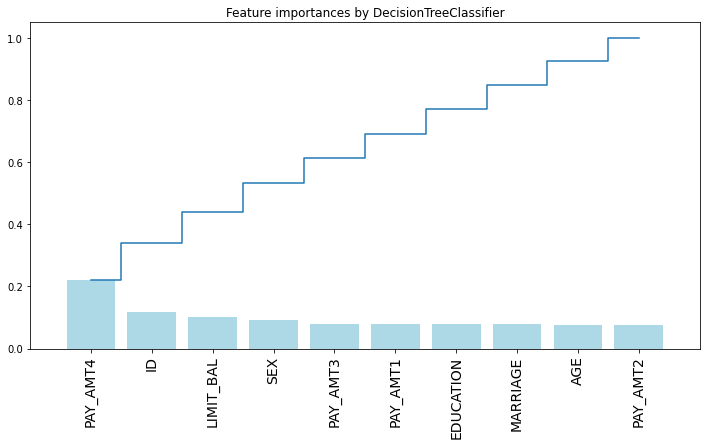

In [135]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [136]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [137]:
X_test.shape

(9000, 10)

In [138]:
y_prediction = rf.predict(X_test)

In [139]:
y_probability = rf.predict_proba(X_test)

In [140]:
y_probability.shape

(9000, 2)

In [141]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.2811224489795918


In [142]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [143]:
print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.95      0.88      7040
     default       0.61      0.28      0.38      1960

    accuracy                           0.80      9000
   macro avg       0.72      0.62      0.63      9000
weighted avg       0.78      0.80      0.77      9000



In [144]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [145]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6686  354]
 [1409  551]]


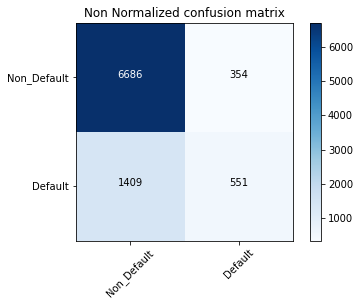

In [146]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')